#Preparação


In [ ]:
rm ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
rmdir ~/.kaggle

rmdir: failed to remove '/root/.kaggle': No such file or directory


In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import os
import shutil
from sklearn.utils import resample
from plotly.offline import plot, iplot
from google.colab import files
import cufflinks as cf 
cf.go_offline()
py.offline.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

In [ ]:
!mkdir ~/.kaggle

api_token = {"username":"username","key":"api-key"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

##Pegando os data sets de 2016





In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content/sample_data'

In [ ]:
!kaggle datasets download -d arturbritosouza/fies-para-a-pesquisa

100% 1.72G/1.72G [00:55<00:00, 38.5MB/s]
100% 1.72G/1.72G [00:55<00:00, 33.2MB/s]


In [ ]:
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2016.csv" 
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2016.csv" 

Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2016.csv  
Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2016.csv  


#Colocando em datasets para analisar


In [ ]:
fields1 = [
'SG_UF', 'ST_DEFICIENCIA', 'DS_RACA_COR', 'ST_ENSINO_MEDIO_ESCOLA_PUBLICA', 'DS_TIPO_CURSO', 'DS_CURSO', 'DS_SEXO', 'NO_IES',
'NO_MUNICIPIO', 'NO_AGENTE_FINANCEIRO', 'DS_ESTADO_CIVIL', 'DS_PERIODICIDADE_CUR', 'NU_ANO_PROC', 'NU_MES_PROC' , 'NU_SEMESTRE',
'NU_MES',  'NU_ANO', 'TP_FIANCA', 'VL_REPASSE',  'CO_CONTRATO_FIES', 'VL_PERC_FINANCIAMENTO', 'QT_SEMESTRE_FINANCIADO', 'DT_NASCIMENTO',
'CO_PROCESSO', 'NU_ANO_EXERCICIO_INSC', 'NU_PERCENTUAL_PROUNI', 'NU_PERCENT_SOLICITADO_FINANC', 'VL_MENSALIDADE'
]
fields2 = [
'#SG_UF', 'ST_DEFICIENCIA', 'DS_RACA_COR', 'ST_ENSINO_MEDIO_ESCOLA_PUBLICA', 'DS_TIPO_CURSO', 'DS_CURSO', 'DS_SEXO', 'NO_IES',
'NO_MUNICIPIO', 'NO_AGENTE_FINANCEIRO', 'DS_ESTADO_CIVIL', 'DS_PERIODICIDADE_CUR', 'NU_ANO_PROC', 'NU_MES_PROC' , 'NU_SEMESTRE',
'NU_MES',  'NU_ANO', 'TP_FIANCA', 'VL_REPASSE',  'CO_CONTRATO_FIES', 'VL_PERC_FINANCIAMENTO', 'QT_SEMESTRE_FINANCIADO', 'DT_NASCIMENTO',
'CO_PROCESSO', 'NU_ANO_EXERCICIO_INSC', 'NU_PERCENTUAL_PROUNI', 'NU_PERCENT_SOLICITADO_FINANC', 'VL_MENSALIDADE'
]

In [ ]:
df6 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2016.csv', encoding="ISO-8859-1", sep = ';', usecols=fields1)
df15 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2016.csv', encoding="ISO-8859-1", sep = ';', usecols=fields2)

In [ ]:
pd.set_option('display.max_columns', 50)
df6

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,181,2321414,Banco do Brasil,2,1,2016,"1014,63",F,2015.0,0.0,100.0,"24905,2",9/01/1986 00:00:00,N,S,Masculino,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,4
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,181,2321414,Banco do Brasil,1,1,2016,"1014,63",F,2015.0,0.0,100.0,"24905,2",9/01/1986 00:00:00,N,S,Masculino,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,4
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,181,2321414,Banco do Brasil,3,1,2016,"1014,63",F,2015.0,0.0,100.0,"24905,2",9/01/1986 00:00:00,N,S,Masculino,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,4
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,185,2321414,Banco do Brasil,4,1,2016,"1014,63",F,2015.0,0.0,100.0,"24905,2",9/01/1986 00:00:00,N,S,Masculino,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,5
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,190,2321414,Banco do Brasil,5,1,2016,"1014,63",F,2015.0,0.0,100.0,"24905,2",9/01/1986 00:00:00,N,S,Masculino,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9441069,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,190,2595078,Banco do Brasil,4,1,2016,"1648,41",F,2016.0,0.0,87.0,"20770,01",6/08/1976 00:00:00,N,S,Feminino,União estável,Pardo,87.0,8.0,ODONTOLOGIA,Bacharelado,Semestral,2016,6
9441070,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,190,2595078,Banco do Brasil,2,1,2016,"1648,41",F,2016.0,0.0,87.0,"20770,01",6/08/1976 00:00:00,N,S,Feminino,União estável,Pardo,87.0,8.0,ODONTOLOGIA,Bacharelado,Semestral,2016,6
9441071,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,190,2595078,Banco do Brasil,3,1,2016,"1648,41",F,2016.0,0.0,87.0,"20770,01",6/08/1976 00:00:00,N,S,Feminino,União estável,Pardo,87.0,8.0,ODONTOLOGIA,Bacharelado,Semestral,2016,6
9441072,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,190,2595078,Banco do Brasil,1,1,2016,"1648,41",F,2016.0,0.0,87.0,"20770,01",6/08/1976 00:00:00,N,S,Feminino,União estável,Pardo,87.0,8.0,ODONTOLOGIA,Bacharelado,Semestral,2016,6


In [ ]:
pd.set_option('display.max_columns', 50)
df15

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,2321414,Banco do Brasil,12,2,2016,"1014,65",F,2015.0,"0,00","100,00","43997,60",09/01/1986,N,S,Masculino,Casado,Negro,"100,00",10,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,1
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,1871333,Banco do Brasil,12,2,2016,"918,35",F,2014.0,"0,00","100,00","37276,90",04/06/1990,N,S,Feminino,Divorciado,Branco,"100,00",8,DIREITO,Bacharelado,Anual,2017,1
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,747842,Banco do Brasil,12,2,2016,"490,85",N,2012.0,"0,00","50,00","17545,72",06/01/1981,N,S,Feminino,Solteiro,Branco,"50,00",10,DIREITO,Bacharelado,Anual,2017,1
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,2403582,Banco do Brasil,12,2,2016,"791,70",F,2015.0,"0,00","100,00","36831,80",08/10/1975,N,S,Masculino,Solteiro,Pardo,"100,00",10,DIREITO,Bacharelado,Anual,2017,1
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,604340,Caixa Econômica Federal,12,2,2016,"981,70",N,2012.0,"0,00","100,00","35817,51",15/10/1988,N,S,Feminino,Solteiro,Pardo,"100,00",10,DIREITO,Bacharelado,Anual,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213952,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,222,2633229,Caixa Econômica Federal,12,2,2016,"1572,65",F,2016.0,"0,00","94,00","40499,72",16/04/1994,N,S,Feminino,Solteiro,Pardo,"94,00",8,ODONTOLOGIA,Bacharelado,Semestral,2017,1
2213953,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,222,2630291,Caixa Econômica Federal,12,2,2016,"906,23",F,2016.0,"0,00","94,00","15666,92",04/09/1994,N,S,Feminino,Solteiro,Branco,"94,00",10,ENFERMAGEM,Bacharelado,Semestral,2017,1
2213954,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,222,2634438,Caixa Econômica Federal,12,2,2016,"590,87",F,2016.0,"0,00","59,00","3545,22",04/11/1989,N,P,Feminino,Solteiro,Pardo,"59,00",10,ENFERMAGEM,Bacharelado,Semestral,2017,1
2213955,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,222,2647063,Banco do Brasil,12,2,2016,"784,93",F,2016.0,"0,00","74,00","14387,45",06/05/1997,N,P,Feminino,Solteiro,Pardo,"74,00",10,ENGENHARIA CIVIL,Bacharelado,Semestral,2017,1


In [ ]:
pd.reset_option("^display")

#Tratamento inicial.

###Crindo uma palheta de cores.

In [ ]:
cores = ['#009739', '#FEDD00', '#012169', '#FFFFFF', '#fe9e00', '#e0fe00', '#00fedd', '#0021fe', '#5e00fe', 
         '#dd00fe',  '#131000', '#898675', '#ffd4de', '#fed78d', '#867589', '#fe0021', '#00a0fe', '#3333ff',
         '#336600', '#660033', '#003a32', '#fe0060', '#260005', '#666699', '#66ff99', '#99ffcc', '#ccff99' ]

##Com os dados de 2016.1

###Retirando as repetições

In [ ]:
repeticoes = df6['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df6['MESES_CONSEDIDOS'] = df6.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df6

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,181,2321414,Banco do Brasil,2,1,2016,"1014,63",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,4,6
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,181,2321414,Banco do Brasil,1,1,2016,"1014,63",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,4,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,181,2321414,Banco do Brasil,3,1,2016,"1014,63",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,4,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,185,2321414,Banco do Brasil,4,1,2016,"1014,63",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,5,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,190,2321414,Banco do Brasil,5,1,2016,"1014,63",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9441069,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,190,2595078,Banco do Brasil,4,1,2016,"1648,41",...,União estável,Pardo,87.0,8.0,ODONTOLOGIA,Bacharelado,Semestral,2016,6,6
9441070,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,190,2595078,Banco do Brasil,2,1,2016,"1648,41",...,União estável,Pardo,87.0,8.0,ODONTOLOGIA,Bacharelado,Semestral,2016,6,6
9441071,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,190,2595078,Banco do Brasil,3,1,2016,"1648,41",...,União estável,Pardo,87.0,8.0,ODONTOLOGIA,Bacharelado,Semestral,2016,6,6
9441072,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,190,2595078,Banco do Brasil,1,1,2016,"1648,41",...,União estável,Pardo,87.0,8.0,ODONTOLOGIA,Bacharelado,Semestral,2016,6,6


In [ ]:
df6DuplicateRows = df6[df6.duplicated(subset='CO_CONTRATO_FIES')]
df6DuplicateRows

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,181,2321414,Banco do Brasil,1,1,2016,"1014,63",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,4,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,181,2321414,Banco do Brasil,3,1,2016,"1014,63",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,4,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,185,2321414,Banco do Brasil,4,1,2016,"1014,63",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,5,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,190,2321414,Banco do Brasil,5,1,2016,"1014,63",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,6,6
5,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,195,2321414,Banco do Brasil,6,1,2016,"1014,65",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9441069,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,190,2595078,Banco do Brasil,4,1,2016,"1648,41",...,União estável,Pardo,87.0,8.0,ODONTOLOGIA,Bacharelado,Semestral,2016,6,6
9441070,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,190,2595078,Banco do Brasil,2,1,2016,"1648,41",...,União estável,Pardo,87.0,8.0,ODONTOLOGIA,Bacharelado,Semestral,2016,6,6
9441071,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,190,2595078,Banco do Brasil,3,1,2016,"1648,41",...,União estável,Pardo,87.0,8.0,ODONTOLOGIA,Bacharelado,Semestral,2016,6,6
9441072,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,190,2595078,Banco do Brasil,1,1,2016,"1648,41",...,União estável,Pardo,87.0,8.0,ODONTOLOGIA,Bacharelado,Semestral,2016,6,6


In [ ]:
df6ComLinhasDuplicads = df6
df6 = df6.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df6

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,181,2321414,Banco do Brasil,2,1,2016,"1014,63",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,4,6
6,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,181,1871333,Banco do Brasil,2,1,2016,"918,33",...,Solteiro,Branco,100.0,8.0,DIREITO,Bacharelado,Anual,2016,4,6
12,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,181,747842,Banco do Brasil,1,1,2016,"490,83",...,Solteiro,Branco,50.0,10.0,DIREITO,Bacharelado,Anual,2016,4,6
18,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,181,2403582,Banco do Brasil,3,1,2016,"791,66",...,Casado,Pardo,100.0,10.0,DIREITO,Bacharelado,Anual,2016,4,6
24,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,195,183876,Caixa Econômica Federal,11,2,2012,"591,22",...,Solteiro,Branco,75.0,5.0,DIREITO,Bacharelado,Anual,2016,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9441044,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,190,2595025,Caixa Econômica Federal,3,1,2016,"1582,25",...,Solteiro,Pardo,94.0,8.0,ODONTOLOGIA,Bacharelado,Semestral,2016,6,6
9441050,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,190,2592727,Caixa Econômica Federal,3,1,2016,"927,96",...,Solteiro,Pardo,95.0,4.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2016,6,6
9441056,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,190,2594292,Caixa Econômica Federal,4,1,2016,"685,39",...,Casado,Pardo,81.0,6.0,ENFERMAGEM,Bacharelado,Semestral,2016,6,6
9441062,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,190,2594932,Caixa Econômica Federal,2,1,2016,"809,24",...,Solteiro,Negro,92.0,10.0,ENFERMAGEM,Bacharelado,Semestral,2016,6,6


In [ ]:
df6ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

137454     60
575629     54
497181     54
144381     54
497069     54
           ..
792070      1
1185362     1
2039205     1
902977      1
751671      1
Name: CO_CONTRATO_FIES, Length: 1409165, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df6.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.409165e+06,1.409165e+06,1.409165e+06,1.409165e+06,1.409165e+06,1.409164e+06,1.409000e+06,1.409164e+06,1.409164e+06,1.409164e+06,1409165.0,1.409165e+06,1.409165e+06
mean,1.842566e+02,1.665161e+06,2.553568e+00,1.019988e+00,2.015940e+03,2.013901e+03,1.051863e+00,9.250252e+01,9.250252e+01,8.719380e+00,2016.0,4.684088e+00,6.699765e+00
std,4.263718e+00,6.310880e+05,1.586455e+00,1.399604e-01,2.649173e-01,1.194392e+00,7.175336e+00,1.460347e+01,1.460347e+01,1.806525e+00,0.0,8.640278e-01,2.283790e+00
min,1.700000e+02,1.112160e+05,1.000000e+00,1.000000e+00,2.010000e+03,2.001000e+03,0.000000e+00,5.000000e+00,5.000000e+00,1.000000e+00,2016.0,2.000000e+00,1.000000e+00
25%,1.810000e+02,1.171992e+06,1.000000e+00,1.000000e+00,2.016000e+03,2.013000e+03,0.000000e+00,9.300000e+01,9.300000e+01,8.000000e+00,2016.0,4.000000e+00,6.000000e+00
50%,1.850000e+02,1.740028e+06,2.000000e+00,1.000000e+00,2.016000e+03,2.014000e+03,0.000000e+00,1.000000e+02,1.000000e+02,9.000000e+00,2016.0,5.000000e+00,6.000000e+00
75%,1.860000e+02,2.216257e+06,3.000000e+00,1.000000e+00,2.016000e+03,2.015000e+03,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+01,2016.0,5.000000e+00,6.000000e+00
max,1.960000e+02,2.597536e+06,1.200000e+01,2.000000e+00,2.016000e+03,2.016000e+03,5.000000e+01,1.000000e+02,1.000000e+02,2.400000e+01,2016.0,7.000000e+00,6.000000e+01


In [ ]:
df6.isnull().sum().sort_values(ascending=False)

DS_ESTADO_CIVIL                   9632
DS_SEXO                           9604
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    9604
ST_DEFICIENCIA                    9604
DT_NASCIMENTO                     9604
DS_RACA_COR                       9604
NU_PERCENTUAL_PROUNI               165
TP_FIANCA                            1
NU_PERCENT_SOLICITADO_FINANC         1
NU_ANO_EXERCICIO_INSC                1
VL_REPASSE                           1
QT_SEMESTRE_FINANCIADO               1
DS_CURSO                             1
DS_TIPO_CURSO                        1
DS_PERIODICIDADE_CUR                 1
NO_IES                               1
VL_PERC_FINANCIAMENTO                1
NU_ANO_PROC                          0
NU_MES_PROC                          0
SG_UF                                0
NO_MUNICIPIO                         0
VL_MENSALIDADE                       0
NU_ANO                               0
NU_SEMESTRE                          0
NU_MES                               0
NO_AGENTE_FINANCEIRO     

In [ ]:
df6.dropna(axis=0, inplace=True)

In [ ]:
df6.isnull().sum().sort_values(ascending=False)

SG_UF                             0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df6.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.399374e+06,1.399374e+06,1.399374e+06,1.399374e+06,1.399374e+06,1.399374e+06,1.399374e+06,1.399374e+06,1.399374e+06,1.399374e+06,1399374.0,1.399374e+06,1.399374e+06
mean,1.842701e+02,1.663738e+06,2.555681e+00,1.020078e+00,2.015939e+03,2.013898e+03,1.053275e+00,9.249406e+01,9.249406e+01,8.716014e+00,2016.0,4.686789e+00,6.701643e+00
std,4.265536e+00,6.314998e+05,1.588509e+00,1.402657e-01,2.655321e-01,1.194954e+00,7.180044e+00,1.461349e+01,1.461349e+01,1.808554e+00,0.0,8.645270e-01,2.286509e+00
min,1.700000e+02,1.112160e+05,1.000000e+00,1.000000e+00,2.010000e+03,2.001000e+03,0.000000e+00,5.000000e+00,5.000000e+00,1.000000e+00,2016.0,2.000000e+00,1.000000e+00
25%,1.810000e+02,1.169081e+06,1.000000e+00,1.000000e+00,2.016000e+03,2.013000e+03,0.000000e+00,9.300000e+01,9.300000e+01,8.000000e+00,2016.0,4.000000e+00,6.000000e+00
50%,1.850000e+02,1.738472e+06,2.000000e+00,1.000000e+00,2.016000e+03,2.014000e+03,0.000000e+00,1.000000e+02,1.000000e+02,9.000000e+00,2016.0,5.000000e+00,6.000000e+00
75%,1.860000e+02,2.215148e+06,3.000000e+00,1.000000e+00,2.016000e+03,2.015000e+03,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+01,2016.0,5.000000e+00,6.000000e+00
max,1.960000e+02,2.597536e+06,1.200000e+01,2.000000e+00,2.016000e+03,2.016000e+03,5.000000e+01,1.000000e+02,1.000000e+02,2.400000e+01,2016.0,7.000000e+00,6.000000e+01


###Criando a coluna de região, baseado nos estados.

In [ ]:
df6['REGIAO'] = df6['SG_UF']

In [ ]:
df6['REGIAO']= df6['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df6['REGIAO']= df6['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df6['REGIAO']= df6['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df6['REGIAO']= df6['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df6['REGIAO']= df6['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df6['CATEGORIA_CIENCIA_CURSO'] = df6['DS_CURSO']

In [ ]:
df6['CATEGORIA_CIENCIA_CURSO']= df6['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS', 'GESTÃO DE AGRONEGÓCIOS',
'GESTÃO DE TERMINAIS E OPERAÇÃO PORTUÁRIA', 'COMUNICAÇÃO INSTITUCIONAL', 'ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR', 'GESTÃO DE VENDAS', 
'CONTROLE DE OBRAS', 'GESTÃO DE SERVIÇOS EM ATENDIMENTO', 'GESTÃO DE SEGURANÇA PÚBLICA (EXPERIMENTAL)', 'GESTÃO DE SEGURANÇA PÚBLICA',
'RECURSOS HUMANOS', 'SEGURANÇA NO TRÂNSITO', 'QUALIDADE', 'GESTÃO MERCADOLÓGICA', 'SERVIÇOS DE TURISMO', 'TURISMO RECEPTIVO', 'GESTÃO EMPRESARIAL',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM RELAÇÕES PÚBLICAS', 'GESTÃO DE SERVIÇOS EXECUTIVOS', 'GESTÃO DE PRODUÇÃO', 'ADMINISTRAÇÃO DE RECURSOS HUMANOS',
'GESTÃO FISCAL E TRIBUTÁRIA', 'CIENCIAS CONTÁBEIS - ÊNFASE EM POLÍTICAS PÚBLICAS'
], 
'Ciências Sociais Aplicadas')


df6['CATEGORIA_CIENCIA_CURSO']= df6['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA', 'RADIOLOGIA MÉDICA', 'ENFERMAGEM E OBSTETRÍCIA',
'FUTEBOL'
], 
'Ciências da Saúde')


df6['CATEGORIA_CIENCIA_CURSO']= df6['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'BIOENERGIA', 'TRANSPORTE TERRESTRE', 'DESENVOLVIMENTO PARA WEB', 'CIÊNCIAS - QUÍMICA',
'ELETRÔNICA', 'TRANSPORTE AÉREO', 'GESTÃO DE REDES DE COMPUTADORES E INTERNET', 'COMPUTAÇÃO CIENTÍFICA', 'MECÂNICA DE PRECISÃO', 'ESTATÍSTICA',
'TELECOMUNICAÇÕES', 'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS INTERNET', 'COMPUTAÇÃO E INFORMÁTICA', 'DESENVOLVIMENTO DE SISTEMAS DE INFORMAÇÃO',
'PROCESSAMENTO DE DADOS', 'REFRIGERAÇÃO E CLIMATIZAÇÃO', 'SOLDAGEM'
], 
'Ciências Exatas e da Terra')

df6['CATEGORIA_CIENCIA_CURSO']= df6['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO',
'ENGENHARIA INDUSTRIAL', 'ENGENHARIA DE AUTOMAÇÃO EMPRESARIAL', 'ENGENHARIA INDUSTRIAL MADEIREIRA'
], 
'Engenharias')

df6['CATEGORIA_CIENCIA_CURSO']= df6['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO', 'PAPEL E CELULOSE',
'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS', 'BIOTECNOLOGIA INDUSTRIAL'
], 
'Ciências Biológicas')

df6['CATEGORIA_CIENCIA_CURSO']= df6['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS', 'NATUROLOGIA APLICADA', 'PROCESSOS AMBIENTAIS', 'SANEAMENTO AMBIENTAL', 'QUÍMICA DE ALIMENTOS', 'AGROINDÚSTRIA',
'VITICULTURA E ENOLOGIA'
], 
'Ciências Agrárias')

df6['CATEGORIA_CIENCIA_CURSO']= df6['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO',
'PROGRAMA ESPECIAL DE FORMAÇÃO DE DOCENTE', 'MUSEOLOGIA', 'PSICOPEDAGOGIA', 'EDUCAÇÃO ESPECIAL', 'AGRIMENSURA', 'FORMAÇÃO PEDAGÓGICA DE DOCENTES PARA A EDUCAÇÃO BÁSICA E PROFISSIONAL'
], 
'Ciências Humanas')

df6['CATEGORIA_CIENCIA_CURSO']= df6['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS',
'COMUNICAÇÃO EM CRIAÇÃO E DESENVOLVIMENTO DE WEB SITES E DESIGN', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL E MULTIMÍDIA',
'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO MERCADOLÓGICA', 'COSMETOLOGIA E ESTÉSTICA', 'RADIALISMO', 'ARTES PLÁSTICAS', 'EDUCAÇÃO ARTÍSTICA - ARTES PLÁSTICAS',
'LETRAS - LÍNGUA INGLESA', 'CONSERVAÇÃO E RESTAURO', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA E MÍDIAS DIGITAIS',
'LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'MODA E DESIGN', 'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA ESPANHOLA E RESPECTIVAS LITERATURAS',
'MÚSICA - CANTO', 'PRODUÇÃO GRÁFICA', 'LETRAS - TRADUTOR', 'DESIGN DO PRODUTO', 'TRADUTOR EM INGLÊS', 'MÙSICA - REGÊNCIA CORAL', 'PRODUÇÃO TÊXTIL',
'LETRAS - LIBRAS', 'LETRAS - TRADUÇÃO PORTUGUÊS E INGLÊS', 'DECORAÇÃO & DESIGN', 'LETRAS - PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS'
], 
'Linguística, Letras e Artes')

transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df6['VL_REPASSE'] = df6['VL_REPASSE'].astype('str')
df6['VL_REPASSE'] = df6['VL_REPASSE'].str.replace(',', '.')
df6['VL_REPASSE']  = pd.to_numeric(df6['VL_REPASSE'], errors='coerce')

df6['VL_MENSALIDADE'] = df6['VL_MENSALIDADE'].astype('str')
df6['VL_MENSALIDADE'] = df6['VL_MENSALIDADE'].str.replace(',', '.')
df6['VL_MENSALIDADE']  = pd.to_numeric(df6['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df6['VALOR_SEMESTRE_PAGO'] = np.where(df6['MESES_CONSEDIDOS'] > 6,
                                           df6['VL_MENSALIDADE'] * 6,
                                           df6['VL_MENSALIDADE'] * df6['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informações disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df6['VALOR_ARQUIVO_PAGO'] = df6['VL_MENSALIDADE'] * df6['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df6['MESES_CONSEDIDOS'].value_counts()

6     1243248
12     112370
18      23567
4        5136
5        4617
14       3368
3        1963
8        1083
2         816
16        675
10        636
11        530
9         393
1         382
24        194
7         143
17         77
30         74
36         26
15         23
13         15
42         10
54          8
20          7
48          4
22          3
28          2
21          2
60          1
26          1
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df6['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df6['VL_REPASSE'] - df6['VALOR_ARQUIVO_PAGO']

In [ ]:
df6["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

0.00        6157
0.04        2396
0.05        2018
0.01        1877
0.03        1640
            ... 
33129.25       1
28500.20       1
30179.43       1
29723.80       1
10879.55       1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 956067, dtype: int64

O número que mais se repete é 0.000, representando que a diferença dentre esses dois valores não existe, o que é bom para a nossa análise, mas também podemos notar valores diferentes de 0, sejam positivos ou negativos, o que significa que a forma escolhida para tentar descobri os valores repassados não bate em todos os casos com o valor do arquivo. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

##Com os dados de 2016.2

###Retirando as repetições

In [ ]:
repeticoes = df15['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df15['MESES_CONSEDIDOS'] = df15.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df15

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,2321414,Banco do Brasil,12,2,2016,"1014,65",...,Casado,Negro,"100,00",10,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,1,1
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,1871333,Banco do Brasil,12,2,2016,"918,35",...,Divorciado,Branco,"100,00",8,DIREITO,Bacharelado,Anual,2017,1,1
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,747842,Banco do Brasil,12,2,2016,"490,85",...,Solteiro,Branco,"50,00",10,DIREITO,Bacharelado,Anual,2017,1,1
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,2403582,Banco do Brasil,12,2,2016,"791,70",...,Solteiro,Pardo,"100,00",10,DIREITO,Bacharelado,Anual,2017,1,1
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,604340,Caixa Econômica Federal,12,2,2016,"981,70",...,Solteiro,Pardo,"100,00",10,DIREITO,Bacharelado,Anual,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213952,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,222,2633229,Caixa Econômica Federal,12,2,2016,"1572,65",...,Solteiro,Pardo,"94,00",8,ODONTOLOGIA,Bacharelado,Semestral,2017,1,1
2213953,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,222,2630291,Caixa Econômica Federal,12,2,2016,"906,23",...,Solteiro,Branco,"94,00",10,ENFERMAGEM,Bacharelado,Semestral,2017,1,1
2213954,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,222,2634438,Caixa Econômica Federal,12,2,2016,"590,87",...,Solteiro,Pardo,"59,00",10,ENFERMAGEM,Bacharelado,Semestral,2017,1,1
2213955,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,222,2647063,Banco do Brasil,12,2,2016,"784,93",...,Solteiro,Pardo,"74,00",10,ENGENHARIA CIVIL,Bacharelado,Semestral,2017,1,1


In [ ]:
df15DuplicateRows = df15[df15.duplicated(subset='CO_CONTRATO_FIES')]
df15DuplicateRows

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
12,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,434758,Banco do Brasil,7,2,2016,"791,66",...,Solteiro,Amarelo,"100,00",10,PSICOLOGIA,Bacharelado,Anual,2017,1,6
13,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,434758,Banco do Brasil,9,2,2016,"791,66",...,Solteiro,Amarelo,"100,00",10,PSICOLOGIA,Bacharelado,Anual,2017,1,6
14,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,434758,Banco do Brasil,11,2,2016,"791,66",...,Solteiro,Amarelo,"100,00",10,PSICOLOGIA,Bacharelado,Anual,2017,1,6
15,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,434758,Banco do Brasil,12,2,2016,"791,70",...,Solteiro,Amarelo,"100,00",10,PSICOLOGIA,Bacharelado,Anual,2017,1,6
16,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,434758,Banco do Brasil,8,2,2016,"791,66",...,Solteiro,Amarelo,"100,00",10,PSICOLOGIA,Bacharelado,Anual,2017,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213922,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,222,2591722,Caixa Econômica Federal,10,2,2016,"1385,89",...,Solteiro,Pardo,"79,00",3,ODONTOLOGIA,Bacharelado,Semestral,2017,1,6
2213923,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,222,2591722,Caixa Econômica Federal,8,2,2016,"1385,89",...,Solteiro,Pardo,"79,00",3,ODONTOLOGIA,Bacharelado,Semestral,2017,1,6
2213924,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,222,2591722,Caixa Econômica Federal,12,2,2016,"1385,92",...,Solteiro,Pardo,"79,00",3,ODONTOLOGIA,Bacharelado,Semestral,2017,1,6
2213925,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,222,2591722,Caixa Econômica Federal,7,2,2016,"1385,89",...,Solteiro,Pardo,"79,00",3,ODONTOLOGIA,Bacharelado,Semestral,2017,1,6


In [ ]:
df15ComLinhasDuplicads = df15
df15 = df15.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df15

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,2321414,Banco do Brasil,12,2,2016,"1014,65",...,Casado,Negro,"100,00",10,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,1,1
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,1871333,Banco do Brasil,12,2,2016,"918,35",...,Divorciado,Branco,"100,00",8,DIREITO,Bacharelado,Anual,2017,1,1
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,747842,Banco do Brasil,12,2,2016,"490,85",...,Solteiro,Branco,"50,00",10,DIREITO,Bacharelado,Anual,2017,1,1
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,2403582,Banco do Brasil,12,2,2016,"791,70",...,Solteiro,Pardo,"100,00",10,DIREITO,Bacharelado,Anual,2017,1,1
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,222,604340,Caixa Econômica Federal,12,2,2016,"981,70",...,Solteiro,Pardo,"100,00",10,DIREITO,Bacharelado,Anual,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213952,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,222,2633229,Caixa Econômica Federal,12,2,2016,"1572,65",...,Solteiro,Pardo,"94,00",8,ODONTOLOGIA,Bacharelado,Semestral,2017,1,1
2213953,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,222,2630291,Caixa Econômica Federal,12,2,2016,"906,23",...,Solteiro,Branco,"94,00",10,ENFERMAGEM,Bacharelado,Semestral,2017,1,1
2213954,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,222,2634438,Caixa Econômica Federal,12,2,2016,"590,87",...,Solteiro,Pardo,"59,00",10,ENFERMAGEM,Bacharelado,Semestral,2017,1,1
2213955,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,222,2647063,Banco do Brasil,12,2,2016,"784,93",...,Solteiro,Pardo,"74,00",10,ENGENHARIA CIVIL,Bacharelado,Semestral,2017,1,1


In [ ]:
df15ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

1086722    18
647182     18
910918     18
634285     18
2653400    18
           ..
2282716     1
2226671     1
2247281     1
2242856     1
2648020     1
Name: CO_CONTRATO_FIES, Length: 1227082, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df15.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.227082e+06,1.227082e+06,1.227082e+06,1.227082e+06,1.227082e+06,1.227078e+06,1.227082e+06,1227082.0,1227082.0,1.227082e+06
mean,2.223617e+02,1.744841e+06,1.157920e+01,1.999150e+00,2.015999e+03,2.014072e+03,8.872533e+00,2017.0,1.0,1.804245e+00
std,4.804978e-01,6.225681e+05,1.235405e+00,2.914210e-02,4.218161e-02,1.180102e+00,1.691242e+00,0.0,0.0,1.845255e+00
min,2.220000e+02,1.112160e+05,1.000000e+00,1.000000e+00,2.010000e+03,2.008000e+03,1.000000e+00,2017.0,1.0,1.000000e+00
25%,2.220000e+02,1.262304e+06,1.200000e+01,2.000000e+00,2.016000e+03,2.013000e+03,8.000000e+00,2017.0,1.0,1.000000e+00
50%,2.220000e+02,1.826992e+06,1.200000e+01,2.000000e+00,2.016000e+03,2.014000e+03,1.000000e+01,2017.0,1.0,1.000000e+00
75%,2.230000e+02,2.283066e+06,1.200000e+01,2.000000e+00,2.016000e+03,2.015000e+03,1.000000e+01,2017.0,1.0,1.000000e+00
max,2.230000e+02,2.654212e+06,1.200000e+01,2.000000e+00,2.016000e+03,2.018000e+03,1.600000e+01,2017.0,1.0,1.800000e+01


In [ ]:
df15.isnull().sum().sort_values(ascending=False)

DS_ESTADO_CIVIL                   160
DS_PERIODICIDADE_CUR              159
NU_PERCENTUAL_PROUNI              157
NU_ANO_EXERCICIO_INSC               4
VL_PERC_FINANCIAMENTO               3
NU_PERCENT_SOLICITADO_FINANC        3
#SG_UF                              0
ST_DEFICIENCIA                      0
NU_MES_PROC                         0
NU_ANO_PROC                         0
DS_TIPO_CURSO                       0
DS_CURSO                            0
QT_SEMESTRE_FINANCIADO              0
DS_RACA_COR                         0
DS_SEXO                             0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA      0
VL_REPASSE                          0
DT_NASCIMENTO                       0
NO_MUNICIPIO                        0
TP_FIANCA                           0
VL_MENSALIDADE                      0
NU_ANO                              0
NU_SEMESTRE                         0
NU_MES                              0
NO_AGENTE_FINANCEIRO                0
CO_CONTRATO_FIES                    0
CO_PROCESSO 

In [ ]:
df15.dropna(axis=0, inplace=True)

In [ ]:
df15.isnull().sum().sort_values(ascending=False)

#SG_UF                            0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df15.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.226605e+06,1.226605e+06,1.226605e+06,1.226605e+06,1.226605e+06,1.226605e+06,1.226605e+06,1226605.0,1226605.0,1.226605e+06
mean,2.223618e+02,1.744806e+06,1.157923e+01,1.999150e+00,2.015999e+03,2.014072e+03,8.872683e+00,2017.0,1.0,1.804183e+00
std,4.805122e-01,6.225621e+05,1.235374e+00,2.914776e-02,4.218017e-02,1.180108e+00,1.691204e+00,0.0,0.0,1.845201e+00
min,2.220000e+02,1.112160e+05,1.000000e+00,1.000000e+00,2.010000e+03,2.008000e+03,1.000000e+00,2017.0,1.0,1.000000e+00
25%,2.220000e+02,1.262259e+06,1.200000e+01,2.000000e+00,2.016000e+03,2.013000e+03,8.000000e+00,2017.0,1.0,1.000000e+00
50%,2.220000e+02,1.826890e+06,1.200000e+01,2.000000e+00,2.016000e+03,2.014000e+03,1.000000e+01,2017.0,1.0,1.000000e+00
75%,2.230000e+02,2.282982e+06,1.200000e+01,2.000000e+00,2.016000e+03,2.015000e+03,1.000000e+01,2017.0,1.0,1.000000e+00
max,2.230000e+02,2.654212e+06,1.200000e+01,2.000000e+00,2.016000e+03,2.018000e+03,1.600000e+01,2017.0,1.0,1.800000e+01


###Criando a coluna de região, baseado nos estados.

In [ ]:
df15['REGIAO'] = df15['#SG_UF']

In [ ]:
df15['REGIAO']= df15['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df15['REGIAO']= df15['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df15['REGIAO']= df15['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df15['REGIAO']= df15['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df15['REGIAO']= df15['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df15['CATEGORIA_CIENCIA_CURSO'] = df15['DS_CURSO']

In [ ]:
df15['CATEGORIA_CIENCIA_CURSO']= df15['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS', 'GESTÃO DE AGRONEGÓCIOS',
'GESTÃO DE TERMINAIS E OPERAÇÃO PORTUÁRIA', 'COMUNICAÇÃO INSTITUCIONAL', 'ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR', 'GESTÃO DE VENDAS', 
'CONTROLE DE OBRAS', 'GESTÃO DE SERVIÇOS EM ATENDIMENTO', 'GESTÃO DE SEGURANÇA PÚBLICA (EXPERIMENTAL)', 'GESTÃO DE SEGURANÇA PÚBLICA',
'RECURSOS HUMANOS', 'SEGURANÇA NO TRÂNSITO', 'QUALIDADE', 'GESTÃO MERCADOLÓGICA', 'SERVIÇOS DE TURISMO', 'TURISMO RECEPTIVO', 'GESTÃO EMPRESARIAL',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM RELAÇÕES PÚBLICAS', 'GESTÃO DE SERVIÇOS EXECUTIVOS', 'GESTÃO DE PRODUÇÃO', 'ADMINISTRAÇÃO DE RECURSOS HUMANOS',
'GESTÃO FISCAL E TRIBUTÁRIA', 'CIENCIAS CONTÁBEIS - ÊNFASE EM POLÍTICAS PÚBLICAS'
], 
'Ciências Sociais Aplicadas')


df15['CATEGORIA_CIENCIA_CURSO']= df15['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA', 'RADIOLOGIA MÉDICA', 'ENFERMAGEM E OBSTETRÍCIA',
'FUTEBOL'
], 
'Ciências da Saúde')


df15['CATEGORIA_CIENCIA_CURSO']= df15['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'BIOENERGIA', 'TRANSPORTE TERRESTRE', 'DESENVOLVIMENTO PARA WEB', 'CIÊNCIAS - QUÍMICA',
'ELETRÔNICA', 'TRANSPORTE AÉREO', 'GESTÃO DE REDES DE COMPUTADORES E INTERNET', 'COMPUTAÇÃO CIENTÍFICA', 'MECÂNICA DE PRECISÃO', 'ESTATÍSTICA',
'TELECOMUNICAÇÕES', 'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS INTERNET', 'COMPUTAÇÃO E INFORMÁTICA', 'DESENVOLVIMENTO DE SISTEMAS DE INFORMAÇÃO',
'PROCESSAMENTO DE DADOS', 'REFRIGERAÇÃO E CLIMATIZAÇÃO', 'SOLDAGEM'
], 
'Ciências Exatas e da Terra')

df15['CATEGORIA_CIENCIA_CURSO']= df15['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO',
'ENGENHARIA INDUSTRIAL', 'ENGENHARIA DE AUTOMAÇÃO EMPRESARIAL', 'ENGENHARIA INDUSTRIAL MADEIREIRA'
], 
'Engenharias')

df15['CATEGORIA_CIENCIA_CURSO']= df15['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO', 'PAPEL E CELULOSE',
'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS', 'BIOTECNOLOGIA INDUSTRIAL'
], 
'Ciências Biológicas')

df15['CATEGORIA_CIENCIA_CURSO']= df15['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS', 'NATUROLOGIA APLICADA', 'PROCESSOS AMBIENTAIS', 'SANEAMENTO AMBIENTAL', 'QUÍMICA DE ALIMENTOS', 'AGROINDÚSTRIA',
'VITICULTURA E ENOLOGIA'
], 
'Ciências Agrárias')

df15['CATEGORIA_CIENCIA_CURSO']= df15['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO',
'PROGRAMA ESPECIAL DE FORMAÇÃO DE DOCENTE', 'MUSEOLOGIA', 'PSICOPEDAGOGIA', 'EDUCAÇÃO ESPECIAL', 'AGRIMENSURA', 'FORMAÇÃO PEDAGÓGICA DE DOCENTES PARA A EDUCAÇÃO BÁSICA E PROFISSIONAL'
], 
'Ciências Humanas')

df15['CATEGORIA_CIENCIA_CURSO']= df15['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS',
'COMUNICAÇÃO EM CRIAÇÃO E DESENVOLVIMENTO DE WEB SITES E DESIGN', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL E MULTIMÍDIA',
'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO MERCADOLÓGICA', 'COSMETOLOGIA E ESTÉSTICA', 'RADIALISMO', 'ARTES PLÁSTICAS', 'EDUCAÇÃO ARTÍSTICA - ARTES PLÁSTICAS',
'LETRAS - LÍNGUA INGLESA', 'CONSERVAÇÃO E RESTAURO', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA E MÍDIAS DIGITAIS',
'LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'MODA E DESIGN', 'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA ESPANHOLA E RESPECTIVAS LITERATURAS',
'MÚSICA - CANTO', 'PRODUÇÃO GRÁFICA', 'LETRAS - TRADUTOR', 'DESIGN DO PRODUTO', 'TRADUTOR EM INGLÊS', 'MÙSICA - REGÊNCIA CORAL', 'PRODUÇÃO TÊXTIL',
'LETRAS - LIBRAS', 'LETRAS - TRADUÇÃO PORTUGUÊS E INGLÊS', 'DECORAÇÃO & DESIGN', 'LETRAS - PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS'
], 
'Linguística, Letras e Artes')

transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df15['VL_REPASSE'] = df15['VL_REPASSE'].astype('str')
df15['VL_REPASSE'] = df15['VL_REPASSE'].str.replace(',', '.')
df15['VL_REPASSE']  = pd.to_numeric(df15['VL_REPASSE'], errors='coerce')

df15['VL_MENSALIDADE'] = df15['VL_MENSALIDADE'].astype('str')
df15['VL_MENSALIDADE'] = df15['VL_MENSALIDADE'].str.replace(',', '.')
df15['VL_MENSALIDADE']  = pd.to_numeric(df15['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df15['VALOR_SEMESTRE_PAGO'] = np.where(df15['MESES_CONSEDIDOS'] > 6,
                                           df15['VL_MENSALIDADE'] * 6,
                                           df15['VL_MENSALIDADE'] * df15['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informaç~es disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df15['VALOR_ARQUIVO_PAGO'] = df15['VL_MENSALIDADE'] * df15['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df15['MESES_CONSEDIDOS'].value_counts()

1     1029968
6      195509
12        491
7         432
3          49
2          47
5          30
8          24
10         22
4          22
18         10
11          1
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df15['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df15['VL_REPASSE'] - df15['VALOR_ARQUIVO_PAGO']

In [ ]:
df15["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

44312.44    281
48045.94    204
35505.34    191
53725.89    186
50013.49    185
           ... 
85763.03      1
49186.54      1
54404.09      1
52023.10      1
22995.89      1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 992529, dtype: int64

O número que mais se repete é 0.000, representando que a diferença dentre esses dois valores não existe, o que é bom para a nossa análise, mas também podemos notar valores diferentes de 0, sejam positivos ou negativos, o que significa que a forma escolhida para tentar descobri os valores repassados não bate em todos os casos com o valor do arquivo. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

#Analises de 2016.1

##Analisando os valores por estado.

In [ ]:
df6.SG_UF.value_counts()

SP    428533
MG    169543
RJ    107085
BA     91116
RS     62856
PR     56086
MT     49661
CE     47996
PE     45520
DF     42659
PB     37049
GO     35922
SC     31170
RN     21362
MA     20347
AM     20224
PA     19851
ES     18325
PI     18166
SE     17947
RO     11971
AP      9997
MS      9973
AC      9675
AL      9040
RR      4739
TO      2561
Name: SG_UF, dtype: int64

In [ ]:
df6_estados_interativo = df6.SG_UF.value_counts()

data_por_genero_interativo = [go.Bar(x=df6_estados_interativo.index,
               y=df6_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.savefig("estudantes por estado 2011.1.png")
files.download("estudantes por estado 2011.1.png") 

plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

##Analisando os valores por região

In [ ]:
df6.REGIAO.value_counts()

SUDESTE         723486
NORDESTE        308543
SUL             150112
CENTRO-OESTE    138215
NORTE            79018
Name: REGIAO, dtype: int64

In [ ]:
df6_regiao_interativo = df6.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df6_regiao_interativo.index,
               y=df6_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 357)
df6.DS_CURSO.value_counts()

DIREITO                     237088
ENGENHARIA CIVIL            119067
ENFERMAGEM                  105905
ADMINISTRAÇÃO                92504
PSICOLOGIA                   79460
                             ...  
ESTATÍSTICA                      1
ONTOPSICOLOGIA                   1
GESTÃO DE AGRONEGÓCIOS           1
ENGENHARIA ELETROTÉCNICA         1
ESTILISMO                        1
Name: DS_CURSO, Length: 357, dtype: int64

In [ ]:
pd.reset_option("^display")

In [ ]:
df6_curso_interativo = df6.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df6_curso_interativo.index,
               y=df6_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df6.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     513433
Ciências da Saúde              379518
Engenharias                    264505
Ciências Humanas               136936
Ciências Agrárias               38358
Ciências Exatas e da Terra      37226
Linguística, Letras e Artes     16116
Ciências Biológicas             13282
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

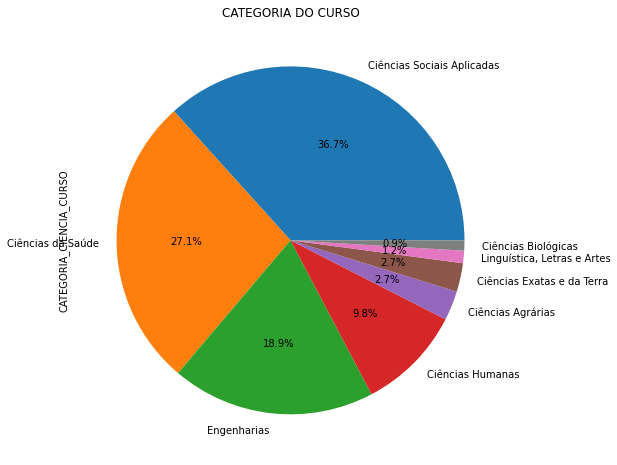

In [ ]:
plot = df6['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df6.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    1059807
N     248416
P      91151
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

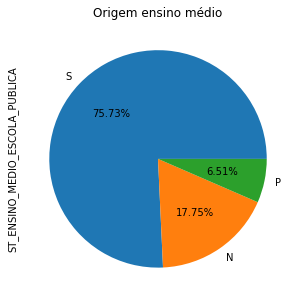

In [ ]:
#pd.set_option('display.float_format', '{:.2%}'.format)
#df6['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True)

plot = df6['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df6.DS_SEXO.value_counts()

Feminino     843372
Masculino    556002
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

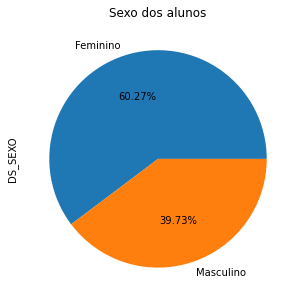

In [ ]:
plot = df6['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1648)
df6.NO_IES.value_counts()

UNIVERSIDADE PAULISTA                                                    68419
UNIVERSIDADE ESTÁCIO DE SÁ                                               45962
Centro Universitário Estácio do Ceará                                    18202
UNIVERSIDADE NOVE DE JULHO                                               17250
UNIVERSIDADE DE CUIABÁ                                                   14137
                                                                         ...  
FACULDADE DE JUNQUEIRÓPOLIS                                                  1
CENTRO UNIVERSITÁRIO DA CIDADE                                               1
FACULDADE DE TECNOLOGIA CÉSAR LATTES                                         1
Faculdade Presidente Antônio Carlos de Itabira                               1
INSTITUTO MUNICIPAL DE ENSINO SUPERIOR DE BEBEDOURO VICTÓRIO CARDASSI        1
Name: NO_IES, Length: 1648, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 493)
df6.NO_MUNICIPIO.value_counts()

São Paulo                     207477
Valinhos                      113680
Belo Horizonte                111430
Rio de Janeiro                 79526
Salvador                       56758
Brasília                       42659
Cuiabá                         34029
Recife                         30986
Fortaleza                      30790
João Pessoa                    22638
Natal                          20988
Manaus                         20224
Curitiba                       18032
Aracaju                        17147
Belém                          14982
Goiânia                        14611
Porto Alegre                   14292
Teresina                       13942
São Luís                       12864
São Gonçalo                    12647
Canoas                         10140
Campina Grande                  9936
Rio Branco                      9675
Macapá                          9441
Montes Claros                   9045
Maceió                          8538
Porto Velho                     7942
J

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df6.ST_DEFICIENCIA.value_counts()

N    1391686
S       7688
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

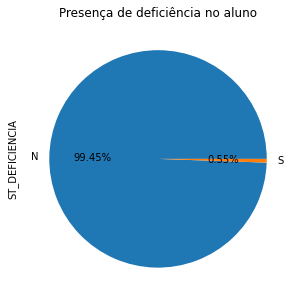

In [ ]:
plot = df6['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df6.DS_RACA_COR.value_counts()

Branco     631669
Pardo      577349
Negro      155394
Amarelo     31913
Índio        3049
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

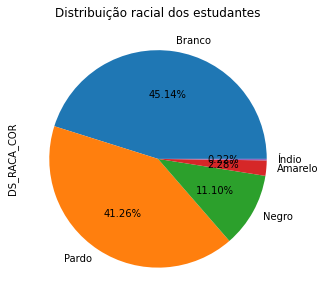

In [ ]:
plot = df6['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df6.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    782775
Banco do Brasil            616599
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

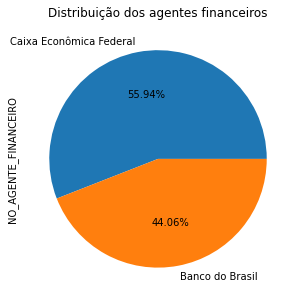

In [ ]:
plot = df6['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df6.DS_ESTADO_CIVIL.value_counts()

Solteiro         1136723
Casado            183521
União estável      37293
Divorciado         30097
Separado            9615
Viúvo               2125
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

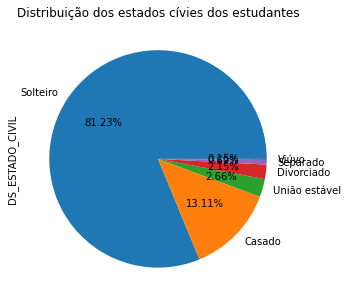

In [ ]:
plot = df6['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df6.DS_PERIODICIDADE_CUR.value_counts()

Semestral     1358983
Anual           39281
Trimestral       1110
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

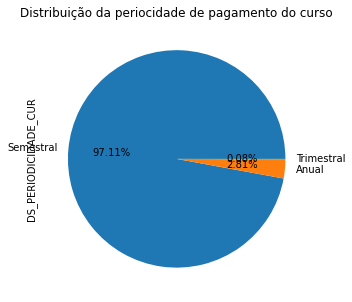

In [ ]:
plot = df6['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")

##Analise da temporalidade dos pagamentos

In [ ]:
df6.NU_ANO_PROC.value_counts()

2016    1399374
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df6ComLinhasDuplicads.NU_MES_PROC.value_counts()

5    2894220
6    2771947
4    1917293
7    1600136
3     223242
2      34236
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

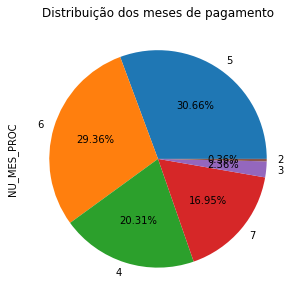

In [ ]:
plot = df6ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df6ComLinhasDuplicads.NU_MES.value_counts()

3     1439151
2     1439022
1     1438992
4     1437917
5     1432936
6     1428269
11     140734
12     140634
9      136269
10     136102
7      135524
8      135524
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

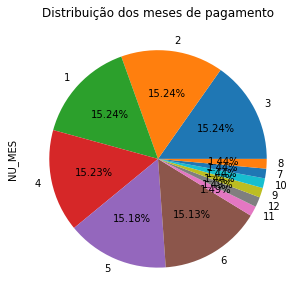

In [ ]:
plot = df6ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df6.NU_SEMESTRE.value_counts()

1    1371278
2      28096
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

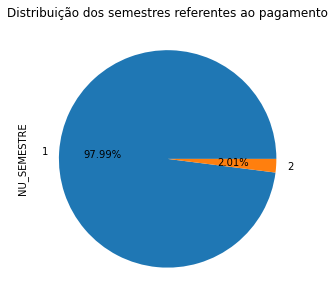

In [ ]:
plot = df6['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df6ComLinhasDuplicads.NU_SEMESTRE.value_counts()

1    8616287
2     824787
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

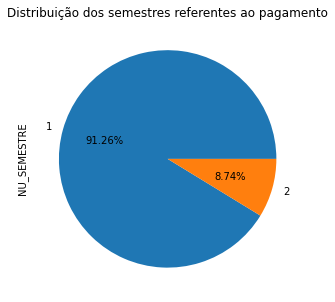

In [ ]:
plot = df6ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df6ComLinhasDuplicads.NU_ANO.value_counts()

2016    8235847
2015    1183109
2014      12608
2013       5035
2012       3011
2011       1242
2010        222
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

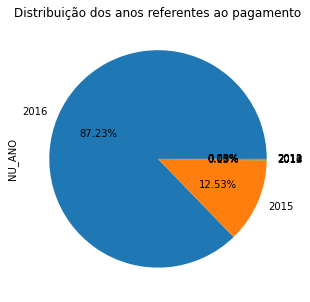

In [ ]:
plot = df6ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df6.TP_FIANCA.value_counts()

F    970820
N    417602
S     10952
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

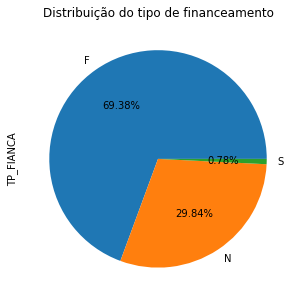

In [ ]:
plot = df6['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df6.DS_TIPO_CURSO.value_counts()

Bacharelado     1243205
Licenciatura      98811
Tecnológico       57357
Sequencial            1
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

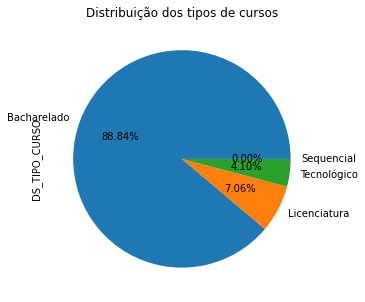

In [ ]:
plot = df6['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df6.CO_PROCESSO.value_counts()

181    393450
185    304065
186    219172
182    178580
190     99668
191     70051
195     23679
172     18905
194     16960
196     13018
179     10675
173      9660
178      7686
183      7305
170      5880
188      5769
174      4231
193      2476
192      2245
187      2200
189      1875
175      1021
176       592
171       173
180        21
184        17
Name: CO_PROCESSO, dtype: int64

In [ ]:
df6.NU_ANO_EXERCICIO_INSC.value_counts()

2014.0    518890
2013.0    309772
2015.0    252758
2016.0    145981
2012.0    141246
2011.0     27311
2010.0      3349
2009.0        53
2008.0         8
2007.0         5
2001.0         1
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df6.NU_PERCENTUAL_PROUNI.value_counts()

0.0     1369894
50.0      29477
25.0          3
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df6.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100.0    1009672
75.0       87363
50.0       81803
80.0       17271
90.0       16363
          ...   
18.0           6
16.0           4
19.0           3
17.0           2
5.0            1
Name: NU_PERCENT_SOLICITADO_FINANC, Length: 88, dtype: int64

In [ ]:
df6.VL_REPASSE.value_counts()

31619.89    453
28132.88    346
44233.49    333
31866.38    310
33744.00    271
           ... 
31934.62      1
24540.89      1
55419.90      1
71926.00      1
11772.24      1
Name: VL_REPASSE, Length: 949706, dtype: int64

In [ ]:
df6.VL_PERC_FINANCIAMENTO.value_counts()

100.0    1009672
75.0       87363
50.0       81803
80.0       17271
90.0       16363
          ...   
18.0           6
16.0           4
19.0           3
17.0           2
5.0            1
Name: VL_PERC_FINANCIAMENTO, Length: 88, dtype: int64

In [ ]:
df6.QT_SEMESTRE_FINANCIADO.value_counts()

10.0    614658
8.0     345507
9.0     103980
6.0      89007
7.0      84561
5.0      40653
12.0     39333
4.0      39231
11.0     27004
3.0       7366
13.0      4912
2.0       2634
1.0        261
14.0       199
15.0        58
16.0         6
17.0         3
24.0         1
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df6.VL_REPASSE.sum()

42763045203.44

In [ ]:
df6.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

SG_UF
SP   12526241926.110
MG    5692573678.230
RJ    3131021637.160
BA    2625547627.000
RS    2440874046.310
PR    1986833889.390
MT    1893553932.640
CE    1557637066.250
DF    1336775584.230
PB    1137795942.100
GO    1106544489.420
SC    1098302106.340
PE    1039359328.580
ES     642139922.170
RN     574075527.890
MA     484296066.420
PI     478334139.110
PA     475330797.330
SE     472993579.050
AM     406110678.920
RO     400806910.820
AC     330476863.060
AP     324030008.250
MS     227570188.520
AL     196290788.420
RR      97197054.020
TO      80331425.700
Name: VL_REPASSE, dtype: float64

In [ ]:
df6_vl_estados_interativo = df6.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df6_vl_estados_interativo.index,
               y=df6_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df6.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        21991977163.670
NORDESTE        8566330064.820
SUL             5526010042.040
CENTRO-OESTE    4564444194.810
NORTE           2114283738.100
Name: VL_REPASSE, dtype: float64

In [ ]:
df6_vl_regiao_interativo = df6.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df6_vl_regiao_interativo.index,
               y=df6_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df6.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             15904268445.580
Ciências Sociais Aplicadas    12790493702.720
Engenharias                    8004531364.250
Ciências Humanas               3212360942.190
Ciências Agrárias              1559386458.870
Ciências Exatas e da Terra      709320450.150
Linguística, Letras e Artes     335562916.450
Ciências Biológicas             247120923.230
Name: VL_REPASSE, dtype: float64

In [ ]:
df6_vl_regiao_interativo = df6.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df6_vl_regiao_interativo.index,
               y=df6_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df6.VALOR_SEMESTRE_PAGO.sum()

8621549857.929995

In [ ]:
df6.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

SG_UF
SP   2551791816.570
MG   1133687797.930
RJ    661424736.110
BA    526969534.110
RS    481059006.230
MT    390554748.120
PR    372278999.600
CE    297549633.780
DF    259389159.720
PB    230791594.700
PE    226816978.090
GO    213857562.220
SC    206592207.450
RN    118651592.100
ES    118077461.460
PA    112856904.060
MA    103208427.780
SE     96311719.660
AM     93660664.170
PI     92152586.050
RO     77290525.060
AP     70122930.770
AC     64866491.290
MS     45502176.550
AL     40033600.260
RR     21396015.910
TO     14654988.180
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df6_vl_estados_interativo = df6.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df6_vl_estados_interativo.index,
               y=df6_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df6.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        4464981812.070
NORDESTE       1732485666.530
SUL            1059930213.280
CENTRO-OESTE    909303646.610
NORTE           454848519.440
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df6_vl_regiao_interativo = df6.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df6_vl_regiao_interativo.index,
               y=df6_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df6.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             3116224083.530
Ciências Sociais Aplicadas    2609100387.830
Engenharias                   1630918267.940
Ciências Humanas               659121114.040
Ciências Agrárias              321705137.090
Ciências Exatas e da Terra     157273237.930
Linguística, Letras e Artes     73158289.840
Ciências Biológicas             54049339.730
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df6_vl_regiao_interativo = df6.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df6_vl_regiao_interativo.index,
               y=df6_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df6.VALOR_ARQUIVO_PAGO.sum()

9687821274.630003

In [ ]:
df6.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

SG_UF
SP   2788222554.220
MG   1349774167.240
RJ    798524309.080
BA    624805286.850
RS    505020609.440
MT    478438780.640
PR    385801999.730
CE    324788094.680
DF    272534823.260
PE    264346547.560
PB    246815167.860
GO    237220653.340
SC    218463169.530
RN    146384212.380
ES    124805784.400
PA    124006354.850
MA    111695445.800
AM    107170541.230
PI    100307489.050
SE     99349409.310
RO     94079022.020
AP     89160471.100
AC     66148664.340
MS     46545485.190
AL     43590996.940
RR     25073424.510
TO     14747810.080
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df6_vl_estados_interativo = df6.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df6_vl_estados_interativo.index,
               y=df6_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df6.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        21991977163.670
NORDESTE        8566330064.820
SUL             5526010042.040
CENTRO-OESTE    4564444194.810
NORTE           2114283738.100
Name: VL_REPASSE, dtype: float64

In [ ]:
df6_vl_regiao_interativo = df6.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df6_vl_regiao_interativo.index,
               y=df6_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df6.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             3468154090.590
Ciências Sociais Aplicadas    2948974051.520
Engenharias                   1853458970.100
Ciências Humanas               738814890.310
Ciências Agrárias              361186791.500
Ciências Exatas e da Terra     176163760.460
Linguística, Letras e Artes     81490492.330
Ciências Biológicas             59578227.820
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df6_vl_regiao_interativo = df6.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df6_vl_regiao_interativo.index,
               y=df6_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

#Analises de 2016.2

##Analisando os valores por estado.

In [ ]:
df15['#SG_UF'].value_counts()

SP    365426
MG    147850
RJ     92003
BA     81483
RS     56052
PR     50218
CE     43995
MT     41699
PE     41100
DF     37442
PB     33735
GO     32477
SC     27393
PA     19141
MA     18446
RN     18366
AM     17639
PI     16860
ES     16642
SE     16525
RO     10706
MS      9078
AC      8873
AP      8620
AL      8310
RR      3995
TO      2531
Name: #SG_UF, dtype: int64

In [ ]:
df15_estados_interativo = df15['#SG_UF'].value_counts()

data_por_genero_interativo = [go.Bar(x=df15_estados_interativo.index,
               y=df15_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.show()

##Analisando os valores por região

In [ ]:
df15.REGIAO.value_counts()

SUDESTE         621921
NORDESTE        278820
SUL             133663
CENTRO-OESTE    120696
NORTE            71505
Name: REGIAO, dtype: int64

In [ ]:
df15_regiao_interativo = df15.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df15_regiao_interativo.index,
               y=df15_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 344)
df15.DS_CURSO.value_counts()

DIREITO                                              215760
ENGENHARIA CIVIL                                     107464
ENFERMAGEM                                            97005
ADMINISTRAÇÃO                                         76424
PSICOLOGIA                                            73839
                                                      ...  
GESTÃO DE AGRONEGÓCIOS                                    1
ENGENHARIA ELETROTÉCNICA                                  1
MÚSICA - CANTO                                            1
COMUNICAÇÃO SOCIAL - CINEMA DIGITAL                       1
CIENCIAS CONTÁBEIS - ÊNFASE EM POLÍTICAS PÚBLICAS         1
Name: DS_CURSO, Length: 344, dtype: int64

In [ ]:
pd.reset_option("^display")

In [ ]:
df15_curso_interativo = df15.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df15_curso_interativo.index,
               y=df15_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df15.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     442054
Ciências da Saúde              344246
Engenharias                    234882
Ciências Humanas               119164
Ciências Agrárias               34896
Ciências Exatas e da Terra      28498
Linguística, Letras e Artes     12289
Ciências Biológicas             10576
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

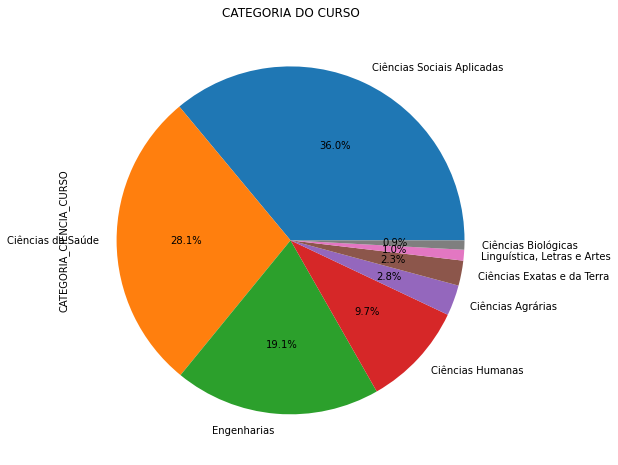

In [ ]:
plot = df15['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df15.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    925462
N    222107
P     79036
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

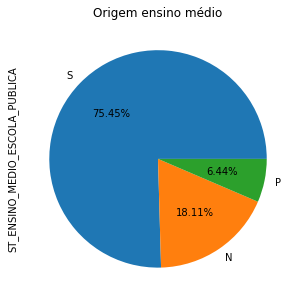

In [ ]:
plot = df15['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df15.DS_SEXO.value_counts()

Feminino     745626
Masculino    480979
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

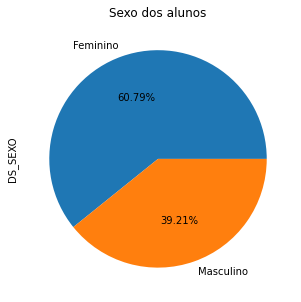

In [ ]:
plot = df15['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1623)
df15.NO_IES.value_counts()

UNIVERSIDADE PAULISTA                                                    59815
UNIVERSIDADE ESTÁCIO DE SÁ                                               38431
UNIVERSIDADE NOVE DE JULHO                                               15135
Centro Universitário Estácio do Ceará                                    14900
UNIVERSIDADE DE CUIABÁ                                                   10830
                                                                         ...  
INSTITUTO SUPERIOR DE EDUCAÇÃO DE GUARATUBA                                  1
FACULDADE EDUCACIONAL DE COLOMBO                                             1
Faculdade Presidente Antônio Carlos de Elói Mendes                           1
INSTITUTO MUNICIPAL DE ENSINO SUPERIOR DE BEBEDOURO VICTÓRIO CARDASSI        1
FACULDADE DE TECNOLOGIA PENTÁGONO                                            1
Name: NO_IES, Length: 1623, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 492)
df15.NO_MUNICIPIO.value_counts()

São Paulo         176513
Belo Horizonte     94025
Valinhos           93860
Rio de Janeiro     67340
Salvador           49370
                   ...  
Palmitos               2
Vinhedo                1
Junqueirópolis         1
Paranaguá              1
Monte Alto             1
Name: NO_MUNICIPIO, Length: 492, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df15.ST_DEFICIENCIA.value_counts()

N    1220070
S       6535
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

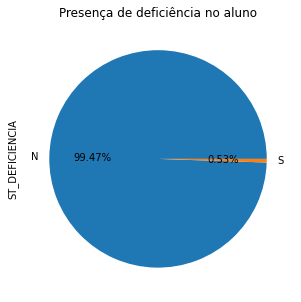

In [ ]:
plot = df15['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df15.DS_RACA_COR.value_counts()

Branco     551655
Pardo      509617
Negro      134756
Amarelo     28002
Índio        2575
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

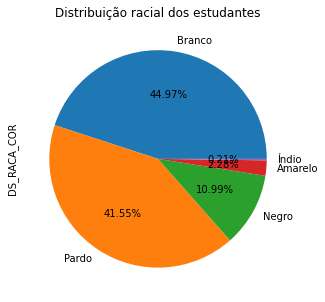

In [ ]:
plot = df15['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df15.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    688588
Banco do Brasil            538017
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

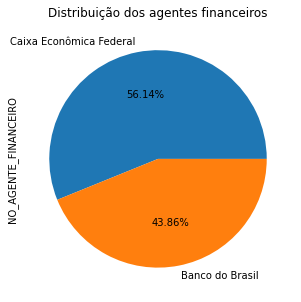

In [ ]:
plot = df15['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df15.DS_ESTADO_CIVIL.value_counts()

Solteiro         1005834
Casado            154216
União estável      31559
Divorciado         25621
Separado            7643
Viúvo               1732
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

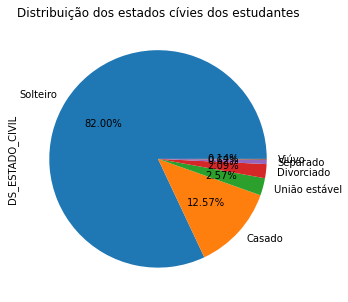

In [ ]:
plot = df15['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df15.DS_PERIODICIDADE_CUR.value_counts()

Semestral     1193657
Anual           32027
Trimestral        921
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

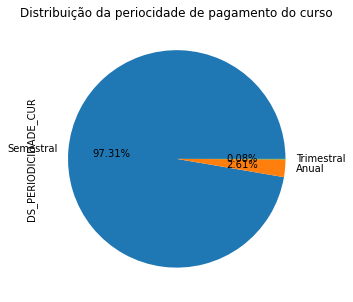

In [ ]:
plot = df15['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")




























##Analise da temporalidade dos pagamentos

In [ ]:
df15.NU_ANO_PROC.value_counts()

2017    1226605
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df15ComLinhasDuplicads.NU_MES_PROC.value_counts()

1    2213957
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

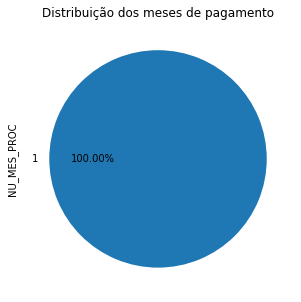

In [ ]:
plot = df15ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df15ComLinhasDuplicads.NU_MES.value_counts()

12    1226932
11     196071
10     195954
9      195954
7      195884
8      195884
1        1213
2        1213
4        1213
5        1213
6        1213
3        1213
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

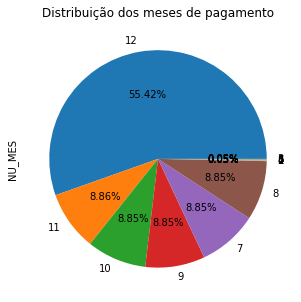

In [ ]:
plot = df15ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df15.NU_SEMESTRE.value_counts()

2    1225562
1       1043
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

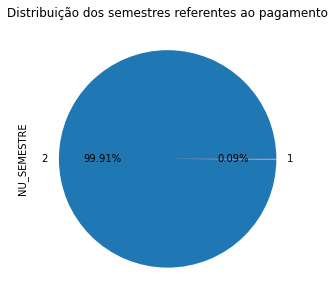

In [ ]:
plot = df15['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df15ComLinhasDuplicads.NU_SEMESTRE.value_counts()

2    2206679
1       7278
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

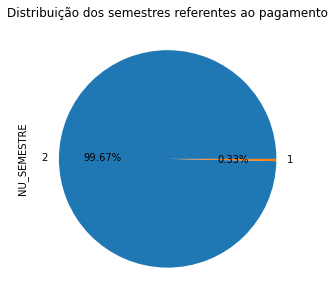

In [ ]:
plot = df15ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df15ComLinhasDuplicads.NU_ANO.value_counts()

2016    2205569
2015       7200
2014        834
2013        192
2012        126
2011         30
2010          6
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

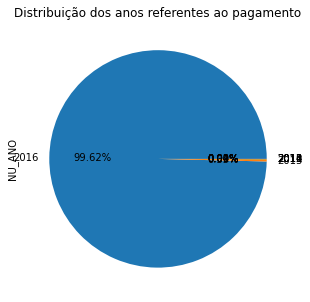

In [ ]:
plot = df15ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df15.TP_FIANCA.value_counts()

F    876929
N    341155
S      8521
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

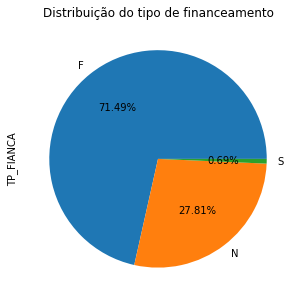

In [ ]:
plot = df15['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df15.DS_TIPO_CURSO.value_counts()

Bacharelado     1111925
Licenciatura      78114
Tecnológico       36566
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

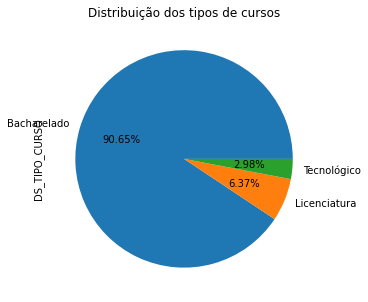

In [ ]:
plot = df15['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df15.CO_PROCESSO.value_counts()

222    782859
223    443746
Name: CO_PROCESSO, dtype: int64

In [ ]:
df15.NU_ANO_EXERCICIO_INSC.value_counts()

2014.0    447596
2013.0    259988
2015.0    228935
2016.0    178020
2012.0     99699
2011.0     11883
2010.0       461
2009.0         9
2017.0         7
2018.0         5
2008.0         2
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df15.NU_PERCENTUAL_PROUNI.value_counts()

0,00     1198354
50,00      28249
25,00          2
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df15.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100,00    851002
75,00      71739
50,00      66340
90,00      17238
80,00      16183
           ...  
12,00          4
13,00          1
8,00           1
11,00          1
5,00           1
Name: NU_PERCENT_SOLICITADO_FINANC, Length: 93, dtype: int64

In [ ]:
df15.VL_REPASSE.value_counts()

45147.38    282
51331.49    255
48880.88    206
55043.89    199
36340.28    192
           ... 
37050.43      1
46799.69      1
24514.21      1
53019.37      1
14387.45      1
Name: VL_REPASSE, Length: 949125, dtype: int64

In [ ]:
df15.VL_PERC_FINANCIAMENTO.value_counts()

100,00    851002
75,00      71739
50,00      66340
90,00      17238
80,00      16183
           ...  
12,00          4
13,00          1
8,00           1
11,00          1
5,00           1
Name: VL_PERC_FINANCIAMENTO, Length: 93, dtype: int64

In [ ]:
df15.QT_SEMESTRE_FINANCIADO.value_counts()

10    564713
8     299411
9      97858
7      70621
6      69359
12     37205
5      28400
11     26376
4      21408
13      5083
3       4167
2       1558
1        200
14       184
15        56
16         6
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df15.VL_REPASSE.sum()

58178718668.69002

In [ ]:
df15.groupby('#SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

#SG_UF
SP   16743148569.520
MG    7763515862.380
RJ    4431829171.700
BA    3660195974.590
RS    3243258445.390
MT    2586545906.270
PR    2586223047.440
CE    2116273721.560
DF    1747903012.740
PB    1623228167.250
PE    1523090803.610
GO    1462539262.580
SC    1416527764.470
ES     830731003.770
RN     807145708.260
PA     742639592.680
MA     702191986.440
SE     676072791.710
PI     652734186.300
AM     579230430.460
RO     539068530.790
AP     474697297.630
AC     442682527.990
MS     305397042.360
AL     278122421.280
RR     137806177.830
TO     105919261.690
Name: VL_REPASSE, dtype: float64

In [ ]:
df15_vl_estados_interativo = df15.groupby('#SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df15_vl_estados_interativo.index,
               y=df15_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df15.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        29769224607.370
NORDESTE       12039055761.000
SUL             7246009257.300
CENTRO-OESTE    6102385223.950
NORTE           3022043819.070
Name: VL_REPASSE, dtype: float64

In [ ]:
df15_vl_regiao_interativo = df15.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df15_vl_regiao_interativo.index,
               y=df15_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df15.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             22124001014.570
Ciências Sociais Aplicadas    16986353263.910
Engenharias                   11040637808.890
Ciências Humanas               4356604984.910
Ciências Agrárias              2220503289.850
Ciências Exatas e da Terra      799803885.290
Linguística, Letras e Artes     367365982.030
Ciências Biológicas             283448439.240
Name: VL_REPASSE, dtype: float64

In [ ]:
df15_vl_regiao_interativo = df15.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df15_vl_regiao_interativo.index,
               y=df15_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df15.VALOR_SEMESTRE_PAGO.sum()

2457907042.0600004

In [ ]:
df15.groupby('#SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

#SG_UF
SP   687311218.450
MG   347702897.440
RJ   182744924.150
RS   159521243.410
PR   140498890.560
BA   133544416.270
CE    94536876.850
MT    82739850.800
SC    75793939.630
DF    66482838.920
PB    65648948.880
GO    62539456.150
PE    56989932.370
ES    41638248.190
PA    32667160.650
SE    32428673.550
RN    32355848.150
PI    32266241.780
MA    23258076.930
AM    22118091.500
RO    21077958.440
AP    16902194.070
MS    13788038.420
AC    13489500.250
AL    10254116.880
TO     4864781.800
RR     4742677.570
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df15_vl_estados_interativo = df15.groupby('#SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df15_vl_estados_interativo.index,
               y=df15_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df15.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        1259397288.230
NORDESTE        481283131.660
SUL             375814073.600
CENTRO-OESTE    225550184.290
NORTE           115862364.280
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df15_vl_regiao_interativo = df15.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df15_vl_regiao_interativo.index,
               y=df15_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df15.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             961435765.260
Ciências Sociais Aplicadas    695523795.130
Engenharias                   463511695.440
Ciências Humanas              168089688.150
Ciências Agrárias              97862745.400
Ciências Exatas e da Terra     39086116.620
Linguística, Letras e Artes    19291273.420
Ciências Biológicas            13105962.640
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df15_vl_regiao_interativo = df15.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df15_vl_regiao_interativo.index,
               y=df15_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df15.VALOR_ARQUIVO_PAGO.sum()

2462335227.4300003

In [ ]:
df15.groupby('#SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

#SG_UF
SP   688024045.790
MG   349485990.010
RJ   182880153.650
RS   159674475.850
PR   140717021.140
BA   133680972.660
CE    94603336.100
MT    82796442.080
SC    75883805.470
DF    66862569.810
PB    65713533.720
GO    62610197.670
PE    57025328.710
ES    41692689.790
PA    32683066.410
SE    32501243.790
RN    32408143.970
PI    32341021.880
MA    23263565.370
AM    22136049.800
RO    21086618.240
AP    16905540.510
MS    13793838.020
AC    13489500.250
AL    10270860.540
TO     5004005.030
RR     4801211.170
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df15_vl_estados_interativo = df15.groupby('#SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df15_vl_estados_interativo.index,
               y=df15_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df15.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        1262082879.240
NORDESTE        481808006.740
SUL             376275302.460
CENTRO-OESTE    226063047.580
NORTE           116105991.410
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df15_vl_regiao_interativo = df15.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df15_vl_regiao_interativo.index,
               y=df15_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df15.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             963760936.760
Ciências Sociais Aplicadas    696446170.780
Engenharias                   464191196.800
Ciências Humanas              168347130.330
Ciências Agrárias              98022280.160
Ciências Exatas e da Terra     39127966.270
Linguística, Letras e Artes    19326890.240
Ciências Biológicas            13112656.090
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df15_vl_regiao_interativo = df15.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df15_vl_regiao_interativo.index,
               y=df15_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")